In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing libraries

import csv
from numpy import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator
from sklearn.feature_extraction.text import CountVectorizer
import swifter
from wordcloud import WordCloud

In [3]:
# Importing own modules

from helper_functions import best_worst_departments, prof_count, add_clean_reviews, concat_prof_reviews, get_ngrams, get_sentiment_scores, get_department_sents
from data_cleaning import remove_stopwords, comments_to_words, lemmatization, professor_tags



## Loading Data

In [4]:
filename = 'data/RateMyProfessor_Sample_data.csv'
datafile = open('data/RateMyProfessor_Sample_data.csv','r')

In [5]:
df = pd.read_csv("data/Clean_data.csv")

## Best & Worst Department Plots

In [6]:
best_department, worst_department = best_worst_departments(datafile)

Text(0.5, 1.0, 'Worst 5 Deparment rating')

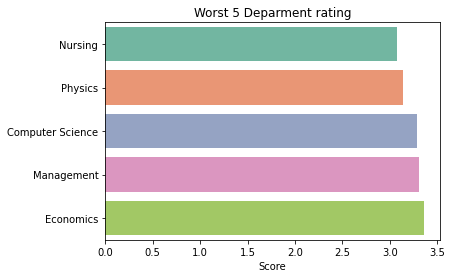

In [7]:
import pandas as pd
import seaborn as sns
y1 = list(worst_department.keys())
x1 = list(worst_department.values())
y2 = list(best_department.keys())
x2 = list(best_department.values())

df_worst = pd.DataFrame(x1, index=y1, columns=['Score'])
df_best = pd.DataFrame(x2, index=y2, columns=['Score'])

sns.barplot(data=df_worst, x="Score", y=y1, orient = 'h', palette="Set2").set_title("Worst 5 Deparment rating")

Text(0.5, 1.0, 'Best 5 Deparment rating')

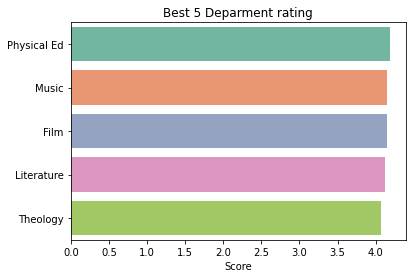

In [8]:
sns.barplot(data=df_best, x="Score", y=y2, orient = 'h', palette="Set2").set_title("Best 5 Deparment rating")

## Plot the department score distribution

In [9]:
df1 = df[['department_name','star_rating','student_star']]
df1 = df1.sort_values(by='department_name')
df1['department_name'] = df1['department_name'].apply(lambda x: x[:-len('department')])
df1.head()

,department_name,star_rating,student_star
63,ASL & Deaf Studies,4.2,2.5
64,ASL & Deaf Studies,4.2,5.0
62,ASL & Deaf Studies,4.2,5.0
61,ASL & Deaf Studies,4.2,2.0
60,ASL & Deaf Studies,4.2,5.0


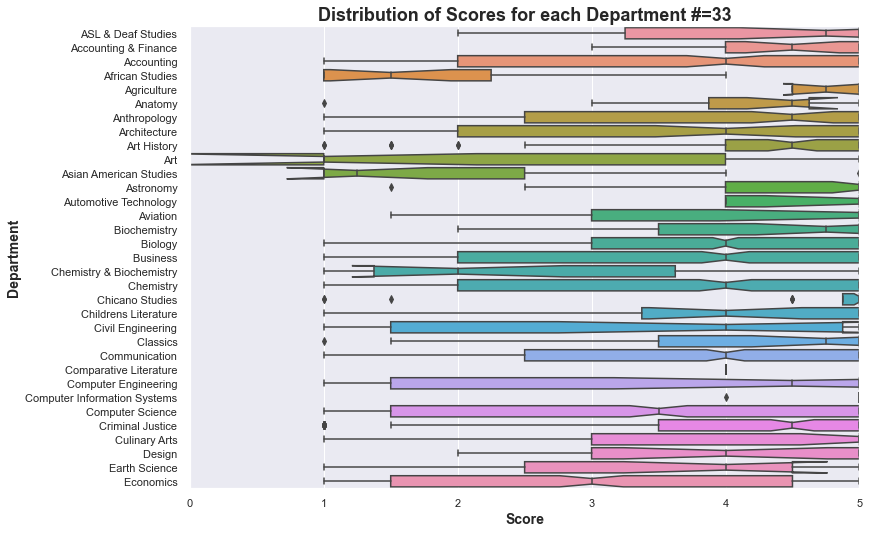

In [10]:
all_department_name = df1.department_name.unique().tolist()
name_setrange = all_department_name[33]
df_p1 = df1[df1['department_name'] < name_setrange]
sns.set(rc={'figure.figsize':(12,8.5)})
sns.boxplot(x='student_star',y='department_name',data=df_p1,notch=True,orient='h')
plt.xlabel('Score',fontsize=14,fontweight="bold")
#ax.set_yticklabels(sorted(df.year.unique()))
plt.ylabel('Department',fontsize=14,fontweight="bold")
plt.title('Distribution of Scores for each Department #=33',fontsize=18,fontweight="bold")
plt.xlim(0,5)
plt.show()

## Ratings change along the year

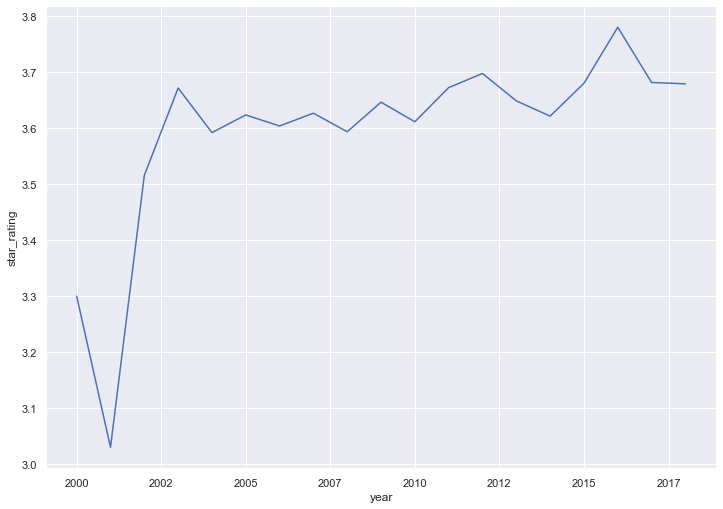

In [11]:
df8 = df[['star_rating','post_date']]
df8['year'] = pd.DatetimeIndex(df8['post_date']).year
df8 = df8.sort_values(by='year', ascending=False)
df8 = df8.groupby('year').mean().reset_index()

ax = sns.lineplot(x='year', y='star_rating', data=df8)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.show()

## Ratings change along the year for ECE

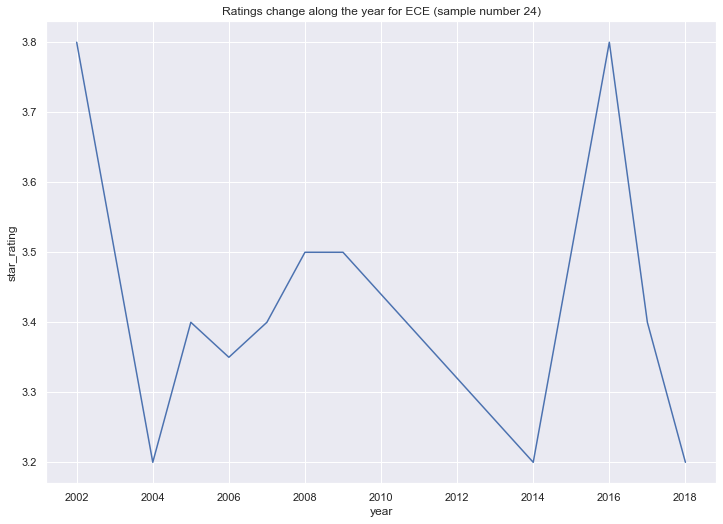

In [12]:

df8_ECE = df[['department_name','star_rating','post_date']]
df8_ECE = df8_ECE[df8_ECE['department_name']=='Electrical Engineering department']
df8_ECE['year'] = pd.DatetimeIndex(df8_ECE['post_date']).year
df8_ECE = df8_ECE.sort_values(by='year', ascending=False)
df8_ECE = df8_ECE.groupby('year').mean().reset_index()

a = str(int(df8_ECE.size))
title1 = 'Ratings change along the year for ECE (sample number '+ a + ')'
ax = sns.lineplot(x='year', y='star_rating', data=df8_ECE).set(title=title1)
plt.show()

## Ratings change along the year for CSE

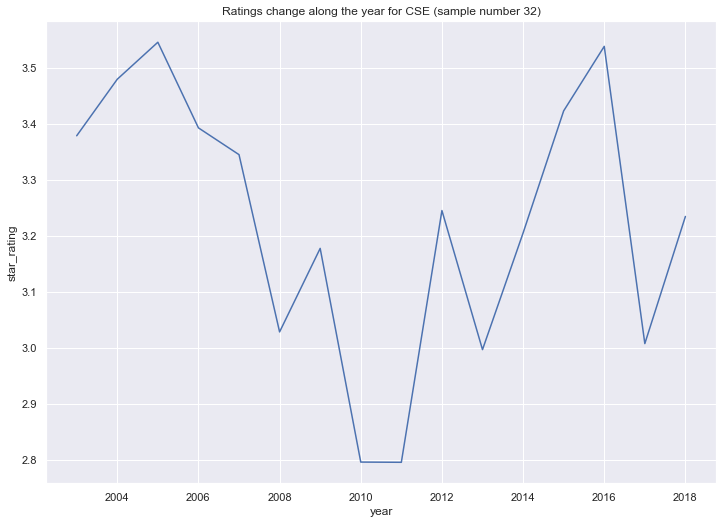

In [13]:
df8_CSE = df[['department_name','star_rating','post_date']]
df8_CSE = df8_CSE[df8_CSE['department_name']=='Computer Science department']
df8_CSE['year'] = pd.DatetimeIndex(df8_CSE['post_date']).year
df8_CSE = df8_CSE.sort_values(by='year', ascending=False)
df8_CSE = df8_CSE.groupby('year').mean().reset_index()

a = str(int(df8_CSE.size))
title1 = 'Ratings change along the year for CSE (sample number '+ a + ')'
ax = sns.lineplot(x='year', y='star_rating', data=df8_CSE).set(title=title1)
plt.show()

### 3 in one

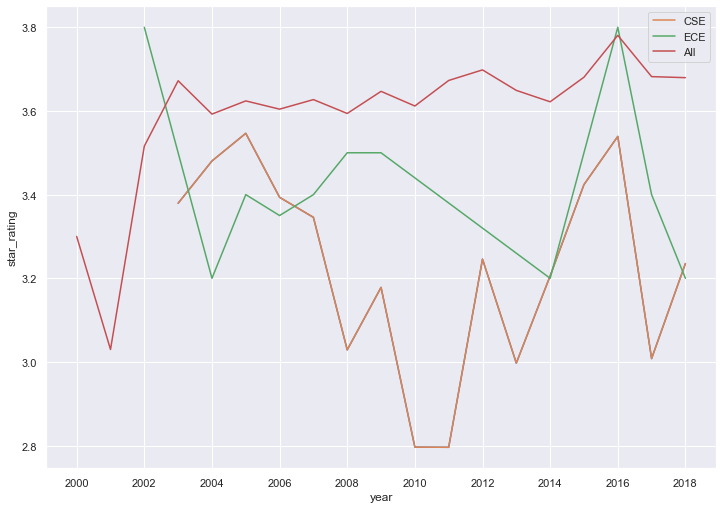

In [14]:
fig, ax = plt.subplots()
sns.lineplot(data=df8_CSE,x='year', y='star_rating', ax=ax, legend=True)
ax = sns.lineplot(x='year', y='star_rating', data=df8_CSE, label="CSE")
ax = sns.lineplot(x='year', y='star_rating', data=df8_ECE, label="ECE")
ax = sns.lineplot(x='year', y='star_rating', data=df8, label="All")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()
plt.show()

## Word Cloud

In [15]:
df = pd.read_csv(filename)
df = add_clean_reviews(df)

dff = df[df['clean_reviews'] != 'comments']  # No comments ~ comments after removing stop words
dff = df[df['clean_reviews'] != 'no comments']  # No comments ~ comments after removing stop words
dff = df[df['clean_reviews_nostop'] != 'comments']  # No comments ~ comments after removing stop words
dff = df[df['clean_reviews_nostop'] != 'no comments']  # No comments ~ comments after removing stop words

dfprofs = concat_prof_reviews(dff)
dftopProfs = dfprofs.sort_values('star_rating', ascending=False)[0:20]
dflowProfs = dfprofs.sort_values('star_rating')[0:20]

In [16]:
# wordcloud function
def show_wordcloud(data, color, title = None): # data - list of strings
    wordcloud = WordCloud(
        background_color = color,
        max_words = 100,
        max_font_size = 60, 
        scale = 3,
        random_state = 42,
        collocation_threshold = 5 
    # ).generate(str(data))
    ).generate(' '.join(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

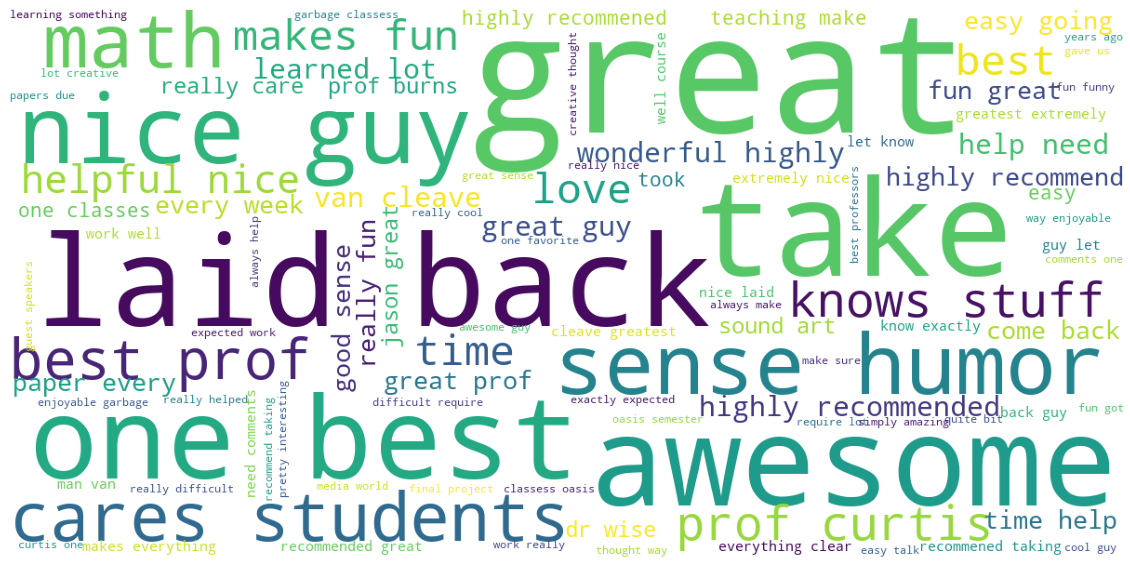

In [17]:
show_wordcloud(list(dftopProfs['clean_reviews_nostop_concat']), 'white')

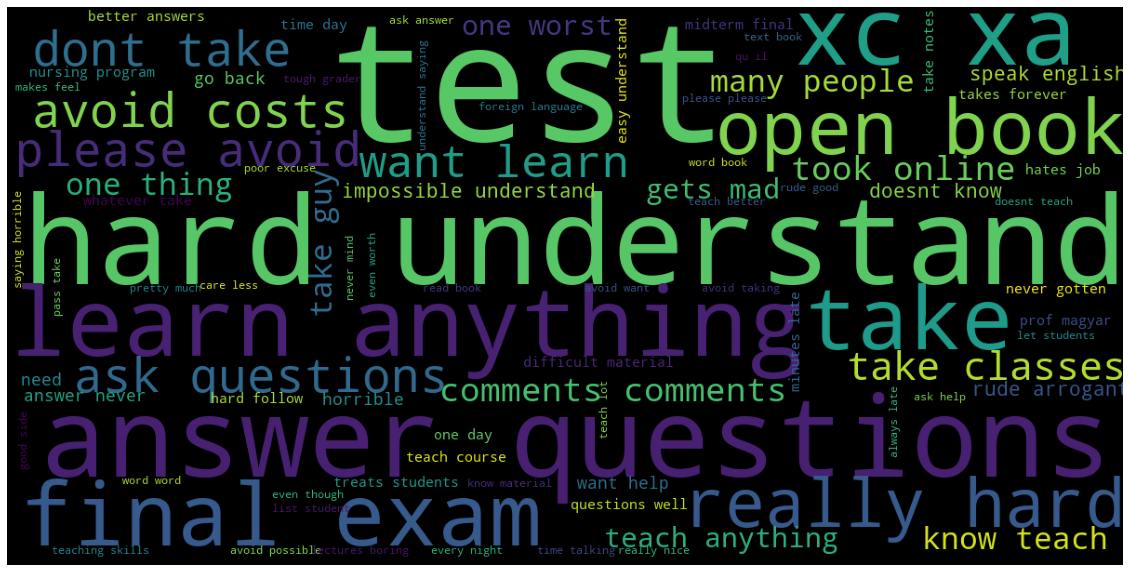

In [18]:
show_wordcloud(list(dflowProfs['clean_reviews_nostop_concat']), 'black')

### Trigram Word Cloud

In [19]:
dflowProfs["bigram_text"] = dflowProfs["clean_reviews_concat"].swifter.apply(get_ngrams, n=2)
dflowProfs["trigram_text"] = dflowProfs["clean_reviews_concat"].swifter.apply(get_ngrams, n=3)
dftopProfs["bigram_text"] = dftopProfs["clean_reviews_concat"].swifter.apply(get_ngrams, n=2)
dftopProfs["trigram_text"] = dftopProfs["clean_reviews_concat"].swifter.apply(get_ngrams, n=3)


Pandas Apply:   0%|          | 0/20 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20 [00:00<?, ?it/s]

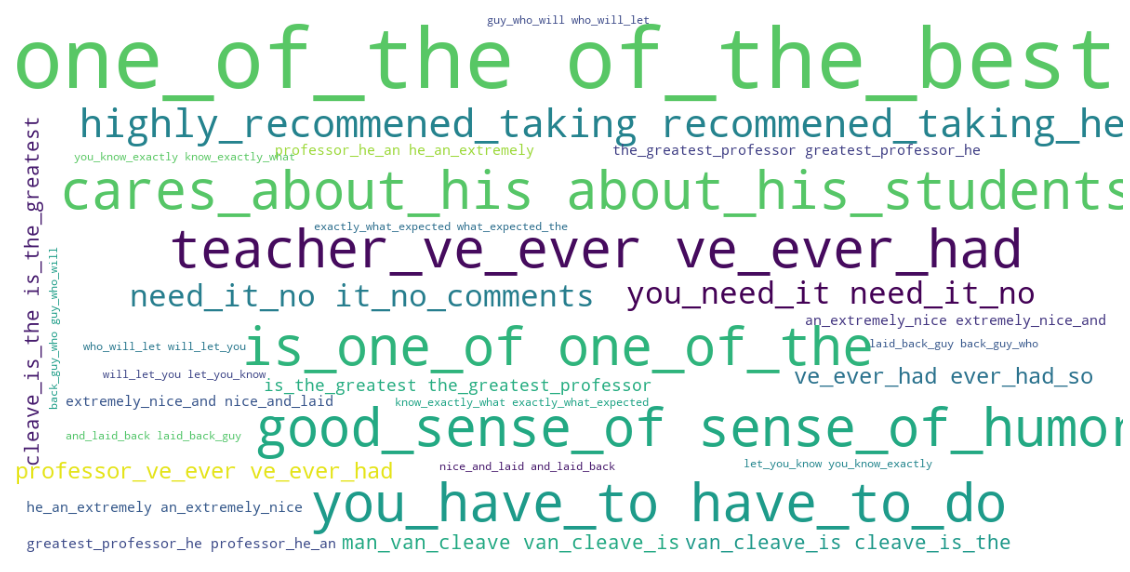

In [20]:
show_wordcloud(list(dftopProfs["trigram_text"]), 'white')

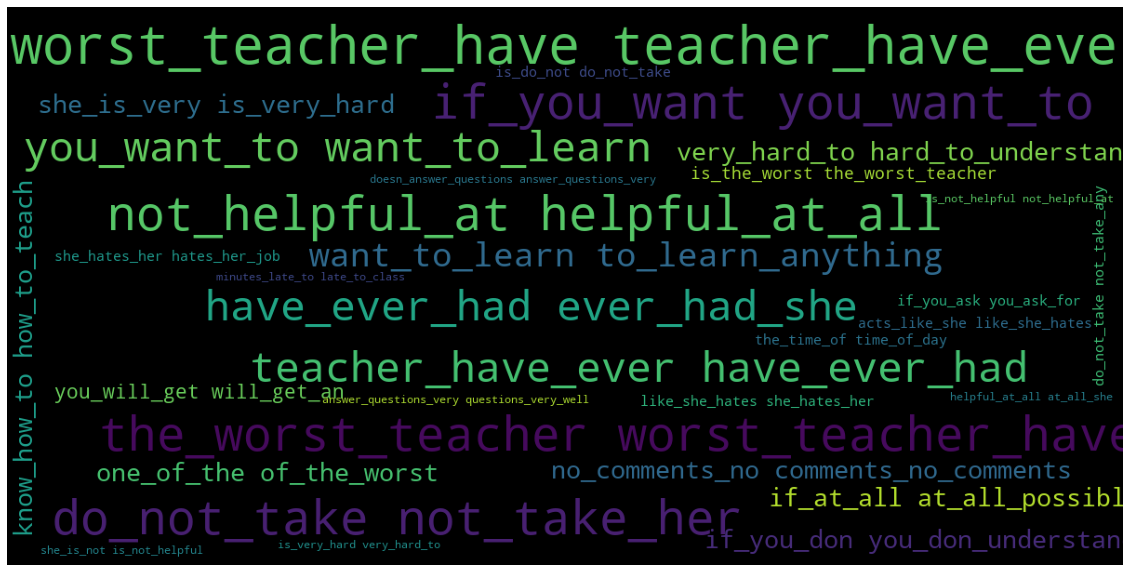

In [21]:
show_wordcloud(list(dflowProfs["trigram_text"]), 'black')

## Sentiment Analysis

In [22]:
df = get_sentiment_scores(df)

# Classify as Bad or Good Review based on Student Star Rating ~ Range(0,5)
df["is_bad_review"] = df["student_star"].apply(lambda x: 1 if x < 3 else 0)


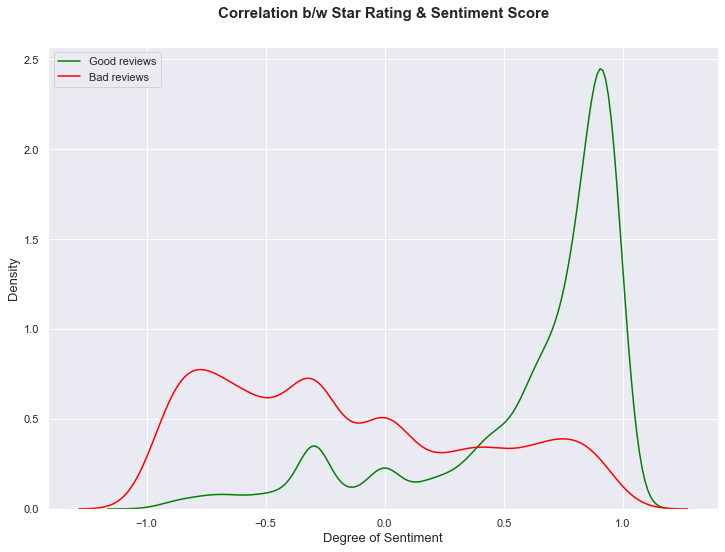

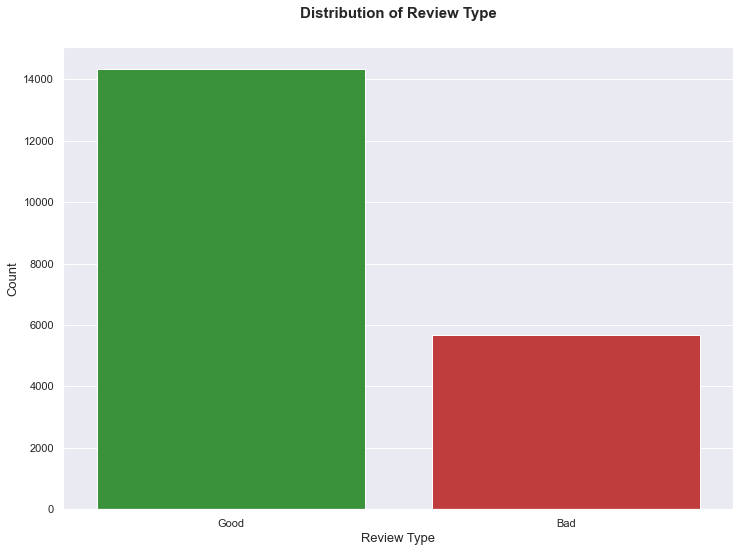

In [23]:
# Plot sentiment distribution for positive and negative reviews ~ Correlation between Star Rating & Sentiment Score
color = ["green", "red"]
for x in [0, 1]:
    subset = df[df['is_bad_review'] == x]
    # Draw the density plot
    if x == 0: label = "Good reviews"
    else: label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label, color = color[x])

#     sns.kdeplot(data = subset['compound'], x)
    

plt.legend()
plt.xlabel('Degree of Sentiment', fontsize = 13, y=1.1)
plt.ylabel('Density',fontsize = 13 , x=1.1)
plt.title("Correlation b/w Star Rating & Sentiment Score", fontsize = 15, weight='bold', y=1.05)
plt.show()

sns.countplot(x ='is_bad_review', data = df, palette = ["#2ca02c", "#d62728"])

plt.xlabel("Review Type", fontsize = 13, y=1.1)
plt.ylabel("Count", fontsize = 13 , x=1.1)
plt.xticks([0,1], ["Good", "Bad"])
plt.title("Distribution of Review Type", fontsize = 15, weight='bold', y=1.05)
plt.show()


### Scatter Plot of Star Rating vs Sentimental Score for CS Department

Text(0.5, 1.05, 'Rating Vs Sentiment (CSE Dept.)')

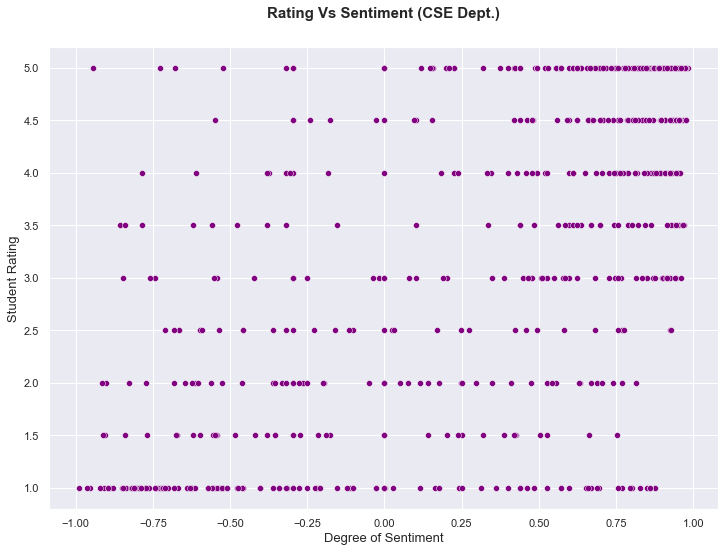

In [24]:
df_CS = df[df['department_name'] == 'Computer Science department']

sns.scatterplot(x="compound", y="student_star", data = df_CS, color = "purple")

plt.xlabel('Degree of Sentiment', fontsize = 13, y=1.1)
plt.ylabel('Student Rating', fontsize = 13, x=1.1)
plt.title('Rating Vs Sentiment (CSE Dept.)', fontsize = 15, weight='bold', y=1.05)

### Deep dive into Low Rating vs High Sentiment

In [25]:
dff_anomaly = df_CS.loc[ (df_CS["student_star"] == 1) & (df_CS["compound"] > 0.75)]

dff_anomaly.head()

,professor_name,school_name,department_name,local_name,state_name,year_since_first_review,star_rating,take_again,diff_index,tag_professor,...,so_many_papers,beware_of_pop_quizzes,IsCourseOnline,clean_reviews,clean_reviews_nostop,neg,neu,pos,compound,is_bad_review
583,Bill Sanders,University of Hartford,Computer Science department,West Hartford,CT,9,2.1,NaN,3.2,NaN,...,0,0,0,extremely unintelligent though well intentione...,extremely unintelligent though well intentione...,0.149,0.633,0.218,0.7686,1
3903,Anita Girton,Pennsylvania College of Technology,Computer Science department,Williamsport,PA,12,3.5,NaN,2.4,GROUP PROJECTS (5) Participation matters (3) ...,...,1,0,0,she is clearly over her head and has no idea w...,clearly head idea talks hear friendly true ind...,0.070,0.685,0.245,0.8750,1
6259,David Martin,Montgomery County Community College (all),Computer Science department,Blue Bell,PA,13,3.3,17%,3.1,LOTS OF HOMEWORK (5) Get ready to read (3) T...,...,0,1,0,worst cis teacher ever seriously he needs to r...,worst cis ever seriously needs retire somethin...,0.075,0.692,0.233,0.8500,1
6262,David Martin,Montgomery County Community College (all),Computer Science department,Blue Bell,PA,13,3.3,17%,3.1,LOTS OF HOMEWORK (5) Get ready to read (3) T...,...,0,1,0,awful makes very difficult subject even more d...,awful makes difficult subject even difficult j...,0.208,0.495,0.297,0.8600,1
6264,David Martin,Montgomery County Community College (all),Computer Science department,Blue Bell,PA,13,3.3,17%,3.1,LOTS OF HOMEWORK (5) Get ready to read (3) T...,...,0,1,0,don take this professor if you have learning d...,take learning differences learning style work ...,0.000,0.884,0.116,0.8020,1


### Correlation b/w Student Difficulty Rating & Sentiment Score

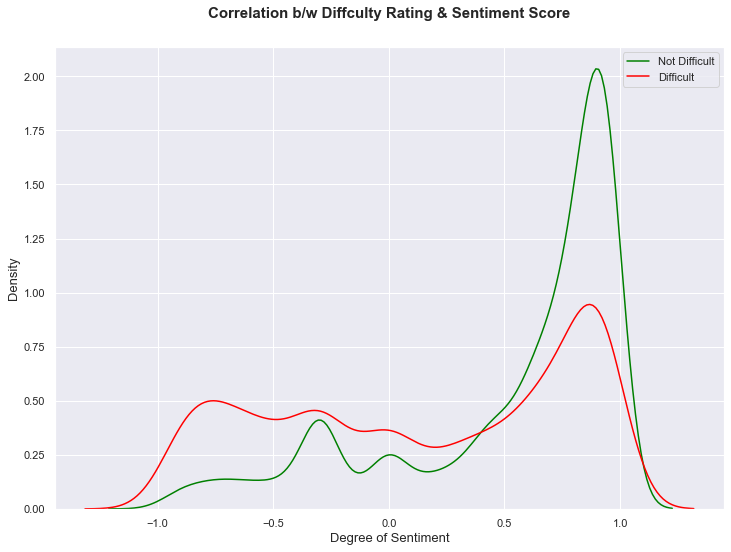

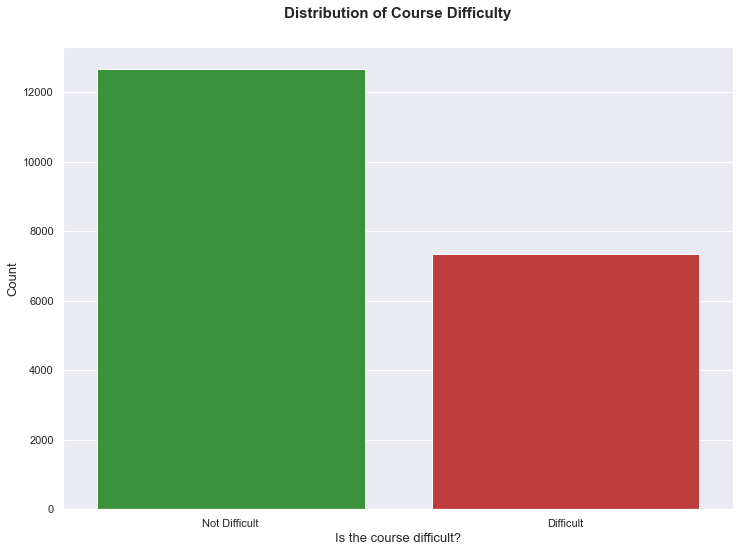

In [26]:
# Classify as Difficult (1) or Not Difficult(0) based on Student Difficult Score ~ Range(0,5) ~ Mean 2.99
df["is_difficult"] = df["student_difficult"].apply(lambda x: 1 if x > 3 else 0)

# Plot sentiment distribution for positive and negative reviews ~ Correlation between Star Rating & Sentiment Score
color = ["green", "red"]
for x in [0, 1]:
    subset = df[df['is_difficult'] == x]
    # Draw the density plot
    if x == 0: 
        label = "Not Difficult"
    else: label = "Difficult"
    sns.distplot(subset['compound'], hist = False, label = label, color = color[x])
    
plt.legend()
plt.xlabel('Degree of Sentiment', fontsize = 13, y=1.1)
plt.ylabel('Density',fontsize = 13 , x=1.1)
plt.title("Correlation b/w Diffculty Rating & Sentiment Score", fontsize = 15, weight='bold', y=1.05)
plt.show()

sns.countplot(x = 'is_difficult', data = df,  palette = ["#2ca02c", "#d62728"])
plt.xlabel("Is the course difficult?", fontsize = 13, y=1.1)
plt.ylabel("Count", fontsize = 13 , x=1.1)
plt.xticks([0,1], ["Not Difficult", "Difficult"])
plt.title("Distribution of Course Difficulty", fontsize = 15, weight='bold', y=1.05)
plt.show()



### Overall Sentiment

In [27]:
def get_sentiment(x):

    if x['compound']>=0.20: return 'Positive'
    elif x['compound']<=-0.20: return 'Negative'
    else: return 'Neutral'
    
#     mapp = {0:'Negative', 1:'Neutral', 2:'Positive'}
#     i = np.argmax([x['neg'], x['neu'], x['pos']]) 

df['Sentiment'] = df.apply(get_sentiment, axis=1)

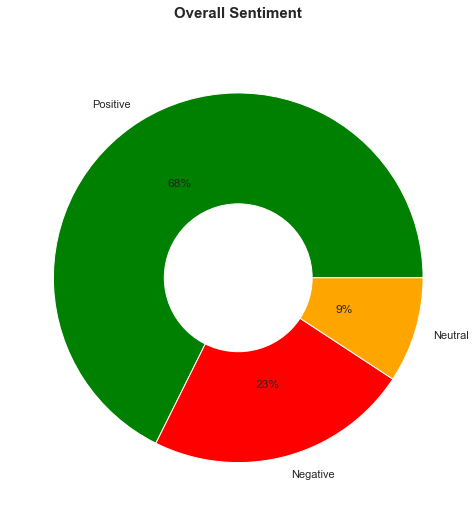

In [28]:
# create data
names = ['Positive', 'Negative', 'Neutral']

szPositive = len(df[df['Sentiment']=='Positive'])
szNegative = len(df[df['Sentiment']=='Negative'])
szNeutral = len(df[df['Sentiment']=='Neutral'])

size = [szPositive,szNegative,szNeutral]
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.4, color='white')

# Give color names
plt.pie(size, labels = names, autopct='%1.0f%%', colors = ['green','red','orange'])

p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.title('Overall Sentiment',  fontsize = 15, weight='bold', y=1.05)
plt.show()

### Sentiment Across Most Rated Depts

Text(0.5, 1.05, 'Sentiment Across Top 25 Most Rated Departments')

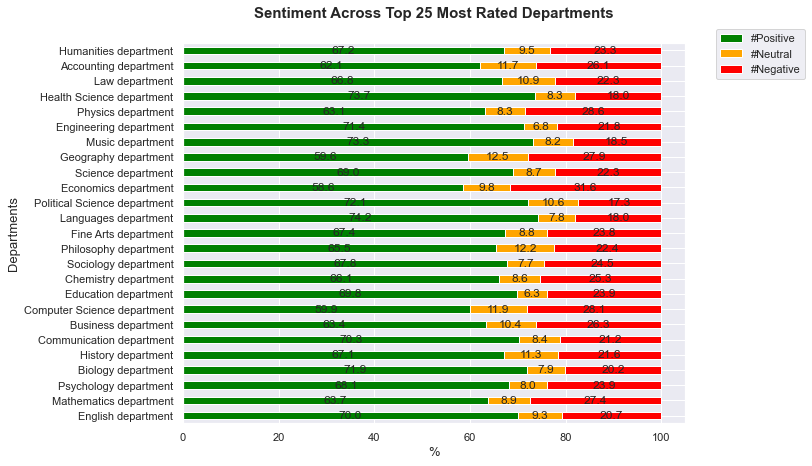

In [29]:
df_dept_sent2 = get_department_sents(df)
df_dept_chunk = df_dept_sent2.head(25)

ax = df_dept_chunk.loc[:, ['#Positive', '#Neutral', '#Negative']].plot(kind='barh', stacked=True, 
                                                                  color=['green', 'orange', 'red'],
                                                                  figsize = (9,7),)
for c in ax.containers:
    labels = ["{:.1f}".format(v.get_width()) if v.get_width() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

plt.legend(bbox_to_anchor=(1.05, 1.05))
plt.xlabel('%',  fontsize = 13, y=1.1)
plt.ylabel('Departments',  fontsize = 13, x=1.1)
plt.title('Sentiment Across Top 25 Most Rated Departments', fontsize = 15, weight='bold', y=1.05)